In [1]:
import os
import zipfile
import shutil
from shutil import copyfile
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(tf.__version__)

2.8.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/Shareddrives/recycraft/scraps-dataset"
%cd /content/drive/Shareddrives/recycraft/scraps-dataset/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/recycraft/scraps-dataset


In [4]:
!kaggle datasets download -d mostafaabla/garbage-classification

garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!kaggle datasets download -d ashwinshrivastav/most-common-recyclable-and-nonrecyclable-objects

most-common-recyclable-and-nonrecyclable-objects.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
root_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/'

def create_train_test_dirs(root_path):
  training_dir = os.path.join(root_path, "train")
  testing_dir = os.path.join(root_path, "test")
  os.makedirs(training_dir)
  os.makedirs(testing_dir)
  os.makedirs(os.path.join(training_dir, "plastic"))
  os.makedirs(os.path.join(training_dir, "paper"))
  os.makedirs(os.path.join(training_dir, "cardboard"))
  os.makedirs(os.path.join(training_dir, "styrofoam"))
  os.makedirs(os.path.join(training_dir, "bottle-plastic"))
  os.makedirs(os.path.join(training_dir, "can"))
  os.makedirs(os.path.join(training_dir, "spoon-plastic"))
  os.makedirs(os.path.join(testing_dir, "plastic"))
  os.makedirs(os.path.join(testing_dir, "paper"))
  os.makedirs(os.path.join(testing_dir, "cardboard"))
  os.makedirs(os.path.join(testing_dir, "styrofoam"))
  os.makedirs(os.path.join(testing_dir, "bottle-plastic"))
  os.makedirs(os.path.join(testing_dir, "can"))
  os.makedirs(os.path.join(testing_dir, "spoon-plastic"))

try:
  create_train_test_dirs(root_path)
  print("Succesfull !")
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed␣ beforehand")

for rootdir, dirs, files in os.walk(root_path):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

You should not be seeing this since the upper directory is removed␣ beforehand
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification
/content/drive/Shareddrives/recycraft/scraps-dataset/train
/content/drive/Shareddrives/recycraft/scraps-dataset/test
/content/drive/Shareddrives/recycraft/scraps-dataset/MainDataset
/content/drive/Shareddrives/recycraft/scraps-dataset/.ipynb_checkpoints
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/battery
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/biological
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/brown-glass
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/cardboard
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/clothes
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/green-glass
/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classificatio

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE=0.9):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(f"{filename} memiliki ukuran 0 sehingga dilewatkan.")
      
  training_len = int(len(files) * SPLIT_SIZE)
  testing_len = int(len(files) - training_len)
  shuffle_set = random.sample(files, len(files))
  training_set = shuffle_set[0:training_len]
  testing_set = shuffle_set[-testing_len:]
  
  for filename in training_set:
    source = SOURCE + filename
    destiny = TRAINING + filename
    copyfile(source, destiny)

  for filename in testing_set:
    source = SOURCE + filename
    destiny = TESTING + filename
    copyfile(source, destiny)

In [8]:
#source path
plastic_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/plastic/'
paper_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/paper/'
cardboard_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/garbage_classification/cardboard/'
styrofoam_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/MainDataset/STYROFOAM/'
bottle_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/MainDataset/BOTTLE/'
can_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/MainDataset/CAN/'
spoon_path = '/content/drive/Shareddrives/recycraft/scraps-dataset/MainDataset/UTENSIL/'

#training & testing path
training_dir = '/content/drive/Shareddrives/recycraft/scraps-dataset/train/'
testing_dir = '/content/drive/Shareddrives/recycraft/scraps-dataset/test/'

#destiny path
plastic_training_dir = os.path.join(training_dir, 'plastic/')
plastic_testing_dir = os.path.join(testing_dir, 'plastic/')
paper_training_dir = os.path.join(training_dir, 'paper/')
paper_testing_dir = os.path.join(testing_dir, 'paper/')
cardboard_training_dir = os.path.join(training_dir, 'cardboard/')
cardboard_testing_dir = os.path.join(testing_dir, 'cardboard/')
styrofoam_training_dir = os.path.join(training_dir, 'styrofoam/')
styrofoam_testing_dir = os.path.join(testing_dir, 'styrofoam/')
bottle_plastic_training_dir = os.path.join(training_dir, 'bottle-plastic/')
bottle_plastic_testing_dir = os.path.join(testing_dir, 'bottle-plastic/')
can_training_dir = os.path.join(training_dir, 'can/')
can_testing_dir = os.path.join(testing_dir, 'can/')
spoon_plastic_training_dir = os.path.join(training_dir, 'spoon-plastic/')
spoon_plastic_testing_dir = os.path.join(testing_dir, 'spoon-plastic/')

if len(os.listdir(plastic_training_dir)) > 0:
  for file in os.scandir(plastic_training_dir):
    os.remove(file.path)
if len(os.listdir(plastic_testing_dir)) > 0:
  for file in os.scandir(plastic_testing_dir):
    os.remove(file.path)

if len(os.listdir(paper_training_dir)) > 0:
  for file in os.scandir(paper_training_dir):
    os.remove(file.path)
if len(os.listdir(paper_testing_dir)) > 0:
  for file in os.scandir(paper_testing_dir):
    os.remove(file.path)

if len(os.listdir(cardboard_training_dir)) > 0:
  for file in os.scandir(cardboard_training_dir):
    os.remove(file.path)
if len(os.listdir(cardboard_testing_dir)) > 0:
  for file in os.scandir(cardboard_testing_dir):
    os.remove(file.path)

if len(os.listdir(styrofoam_training_dir)) > 0:
  for file in os.scandir(styrofoam_training_dir):
    os.remove(file.path)
if len(os.listdir(styrofoam_testing_dir)) > 0:
  for file in os.scandir(styrofoam_testing_dir):
    os.remove(file.path)

if len(os.listdir(bottle_plastic_training_dir)) > 0:
  for file in os.scandir(bottle_plastic_training_dir):
    os.remove(file.path)
if len(os.listdir(bottle_plastic_testing_dir)) > 0:
  for file in os.scandir(bottle_plastic_testing_dir):
    os.remove(file.path)

if len(os.listdir(can_training_dir)) > 0:
  for file in os.scandir(can_training_dir):
    os.remove(file.path)
if len(os.listdir(can_testing_dir)) > 0:
  for file in os.scandir(can_testing_dir):
    os.remove(file.path)

if len(os.listdir(spoon_plastic_training_dir)) > 0:
  for file in os.scandir(spoon_plastic_training_dir):
    os.remove(file.path)
if len(os.listdir(spoon_plastic_testing_dir)) > 0:
  for file in os.scandir(spoon_plastic_testing_dir):
    os.remove(file.path)

split_data(plastic_path, plastic_training_dir, plastic_testing_dir)
split_data(paper_path, paper_training_dir, paper_testing_dir)
split_data(cardboard_path, cardboard_training_dir, cardboard_testing_dir)
split_data(styrofoam_path, styrofoam_training_dir, styrofoam_testing_dir)
split_data(bottle_path, bottle_plastic_training_dir, bottle_plastic_testing_dir)
split_data(can_path, can_training_dir, can_testing_dir)
split_data(spoon_path, spoon_plastic_training_dir, spoon_plastic_testing_dir)

print(f"\nAda {len(os.listdir(plastic_training_dir))} gambar plastic pada training ")
print(f"Ada {len(os.listdir(plastic_testing_dir))} gambar plastic pada testing ")
print(f"Ada {len(os.listdir(paper_training_dir))} gambar paper pada training ")
print(f"Ada {len(os.listdir(paper_testing_dir))} gambar paper pada testing ")
print(f"Ada {len(os.listdir(cardboard_training_dir))} gambar cardboard pada training ")
print(f"Ada {len(os.listdir(cardboard_testing_dir))} gambar cardboard pada testing ")
print(f"Ada {len(os.listdir(styrofoam_training_dir))} gambar styrofoam pada training ")
print(f"Ada {len(os.listdir(styrofoam_testing_dir))} gambar styrofoam pada testing ")
print(f"Ada {len(os.listdir(bottle_plastic_training_dir))} gambar bottle-plastic pada training ")
print(f"Ada {len(os.listdir(bottle_plastic_testing_dir))} gambar bottle-plastic pada testing ")
print(f"Ada {len(os.listdir(can_training_dir))} gambar can pada training ")
print(f"Ada {len(os.listdir(can_testing_dir))} gambar can pada testing ")
print(f"Ada {len(os.listdir(spoon_plastic_training_dir))} gambar spoon_plastic pada training ")
print(f"Ada {len(os.listdir(spoon_plastic_testing_dir))} gambar spoon_plastic pada testing ")


Ada 778 gambar plastic pada training 
Ada 87 gambar plastic pada testing 
Ada 945 gambar paper pada training 
Ada 105 gambar paper pada testing 
Ada 801 gambar cardboard pada training 
Ada 90 gambar cardboard pada testing 
Ada 355 gambar styrofoam pada training 
Ada 40 gambar styrofoam pada testing 
Ada 353 gambar bottle-plastic pada training 
Ada 40 gambar bottle-plastic pada testing 
Ada 368 gambar can pada training 
Ada 41 gambar can pada testing 
Ada 353 gambar spoon_plastic pada training 
Ada 40 gambar spoon_plastic pada testing 


In [21]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range = 20,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     fill_mode = 'nearest')
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 50,
                                                      class_mode = 'categorical',
                                                      target_size = (150,150))
  validation_datagen = ImageDataGenerator(rescale=1./255)
  validation_generator = validation_datagen.flow_from_directory(directory =VALIDATION_DIR,
                                                                batch_size = 50,
                                                                class_mode = 'categorical',
                                                                target_size = (150,150))
  return train_generator, validation_generator

In [22]:
train_generator, validation_generator = train_val_generators(training_dir,testing_dir)

Found 3951 images belonging to 7 classes.
Found 443 images belonging to 7 classes.


In [23]:
def create_model():
  model = tf.keras.models.Sequential([
      keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150,150, 3)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(32, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Flatten(),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(128, activation="relu"),
      keras.layers.Dense(7, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                                                      loss='categorical_crossentropy',
                                                      metrics=['accuracy'])
  return model

In [24]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [25]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 30, verbose=1)

Epoch 1/30
80/80 [==============================] - 50s 606ms/step - loss: 1.7906 - accuracy: 0.3467 - val_loss: 1.3554 - val_accuracy: 0.4628
Epoch 2/30
80/80 [==============================] - 49s 615ms/step - loss: 1.3612 - accuracy: 0.4758 - val_loss: 1.1552 - val_accuracy: 0.5598
Epoch 3/30
80/80 [==============================] - 48s 598ms/step - loss: 1.2786 - accuracy: 0.5523 - val_loss: 1.0360 - val_accuracy: 0.6343
Epoch 4/30
80/80 [==============================] - 48s 594ms/step - loss: 1.1291 - accuracy: 0.6014 - val_loss: 0.8267 - val_accuracy: 0.7201
Epoch 5/30
80/80 [==============================] - 48s 595ms/step - loss: 0.9712 - accuracy: 0.6507 - val_loss: 0.7992 - val_accuracy: 0.7359
Epoch 6/30
80/80 [==============================] - 48s 594ms/step - loss: 0.9257 - accuracy: 0.6644 - val_loss: 0.7384 - val_accuracy: 0.7359
Epoch 7/30
80/80 [==============================] - 48s 598ms/step - loss: 0.8433 - accuracy: 0.7008 - val_loss: 0.8475 - val_accuracy: 0.6840

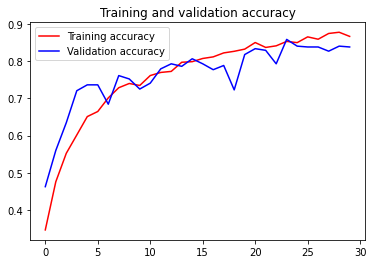

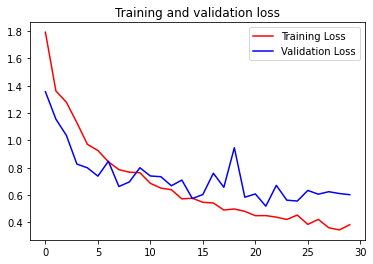

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()